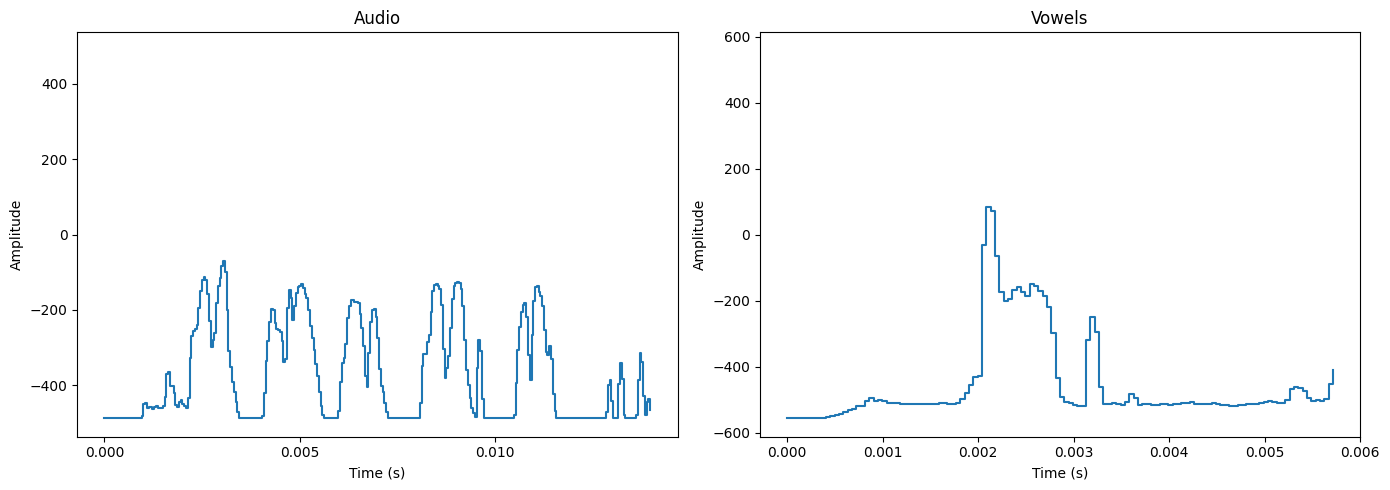

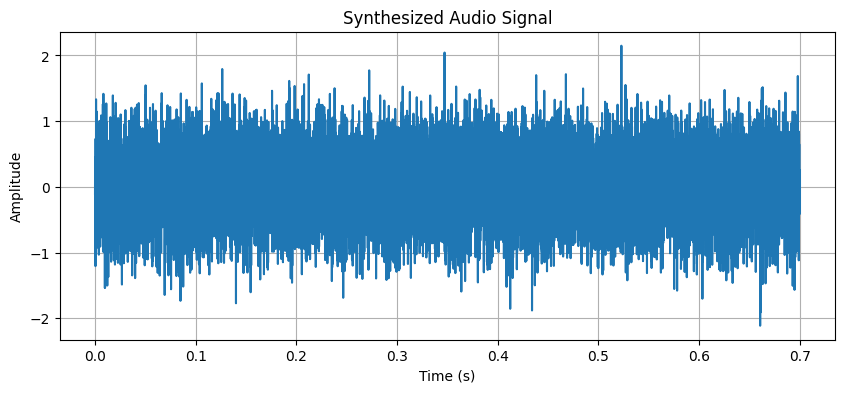

In [9]:
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature, sr

features, sr1 = extract_features("Lab_8_Aneesh.wav")
Vowels, sr2 = extract_features("Vowels.wav")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
librosa.display.waveshow(features, sr=sr1)
plt.title('Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
librosa.display.waveshow(Vowels, sr=sr2)
plt.title('Vowels')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=features.shape))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

phonemes = ['W', 'I', 'F', 'SN', 'T']
phoneme_durations = [0.1, 0.2, 0.15, 0.1, 0.15]

synthesized_audio = np.array([])
for phoneme, duration in zip(phonemes, phoneme_durations):
    sr = 22050  # Sample rate
    audio_segment = np.random.randn(int(sr * duration)) * 0.5

    synthesized_audio = np.append(synthesized_audio, audio_segment)


plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(synthesized_audio)) / sr, synthesized_audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Synthesized Audio Signal')
plt.grid(True)
plt.show()

sf.write('synthesized_audio.wav', synthesized_audio, sr)
